### Problem Statement:

In this project, initially you need to preprocess the data and then develop an understanding of the different features of the data by performing exploratory analysis and creating visualizations. Further, after having sufficient knowledge about the attributes, you will perform a predictive task of classification to predict whether an individual makes over 50,000 a year or less by using different machine learning algorithms.

### Project Objective:

The aim of the project is to employ several supervised algorithms to accurately model individuals' income, whether he makes more than 50,000 or not, using data collected from the 1994 U.S. Census.

### Data Description:

The dataset that will be used is the Census income dataset, which was extracted from the machine learning repository (UCI), which contains about 32561 rows and 15 features.


Listing of attributes:

1. age: The age of an individual (continuous)
2. workclass: A general term to represent the employment status of an individual (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked) (Nominal)
3. fnlwgt: Final weight is the number of people the census believes the entry represents (continuous)
4. education: The highest level of education achieved by an individual (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool) (Ordinal)
5. education-num: The highest level of education achieved in numerical form (Discrete)
6. marital-status: Marital status of an individual (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse) (Nominal)
7. occupation: The general type of occupation of an individual (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces) (Nominal)
8. relationship: Represents what this individual is relative to others (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried) (Nominal)
9. race: Descriptions of an individual’s race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black) (Nominal)
10. sex: The biological sex of the individual (Female, Male) (Nominal)
11. capital-gain: Capital gains for an individual (continuous)
12. capital-loss: Capital loss for an individual (continuous)
13. hours-per-week: The hours an individual has reported to work per week (continuous)
14. native-country: Country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands) (Nominal)
15. income: The label whether or not an individual (Discrete)

In [3]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Python and AI intellipat\Projects\Project – Census Income Project\Data-sets\census-income.csv")

### Overview

In [5]:
#take an overview look at the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# # discard spaces from columns
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
# # discard spaces from entries
columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for column in columns:
    df[column] = df[column].str.strip()

In [8]:

df.drop(df[df['native-country'] == '?'].index,inplace=True)
df.drop(df[df['occupation'] == '?'].index,inplace=True)
df.drop(df[df['workclass'] == '?'].index,inplace=True)

In [9]:
# #2. How many people are working as tech support and have an annual income greater than 50k?
df.loc[(df["occupation"] == 'Tech-support') & (df['income'] == '>50K')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
55,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
248,40,Private,207578,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,60,United-States,>50K
357,40,Private,96129,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
469,30,Private,118551,Bachelors,13,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,16,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31510,42,Private,111483,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
31653,25,Private,189656,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,60,United-States,>50K
31807,51,Self-emp-not-inc,170086,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
32076,59,Federal-gov,293971,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K


In [10]:
# #1. How many types of occupations do we have?
# df['occupation'].nunique()

In [11]:
# # 3. How many total missing values are present in the dataset?
# print(df['native-country'].value_counts())
# print(df['occupation'].value_counts())
# print(df['workclass'].value_counts())

In [12]:
# 4. If there are missing values in the Marital Status column, 
# which option among the following should be used for replacing the missing values:

# df[' marital-status'].value_counts()


#replace with 'Mode'

In [13]:
# 5. How many people are having private work classes and are not from the United States of America?
# df.loc[(df["workclass"] == 'Private') & (df['native-country'] != 'United-States')]

In [14]:
# 6. How many people are either having Annual Income(last column) less than or
# equal to 50k or their working hours is greater than or equal to 40 hrs:

df.loc[(df["income"] == ' <=50K') | (df['hours-per-week'] >= 40)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
#5. Compute how many samples of the population are unmarried and working hours less than 20 hours?
df.loc[(df["marital-status"] == 'Never-married') & (df['hours-per-week'] < 20)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
168,18,Private,25828,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,16,United-States,<=50K
178,18,Private,183930,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
209,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K
262,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
280,22,Private,34918,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,15,Germany,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32316,23,Federal-gov,173851,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,8,United-States,<=50K
32345,18,Private,347336,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
32356,23,Private,133355,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,15,United-States,<=50K
32524,26,Private,191648,Assoc-acdm,12,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,15,United-States,<=50K


In [16]:
# 7. From above census data which country has the highest population and the lowest population?

df1 = df.groupby("native-country")
df1.count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
native-country,,,,,,,,,,,,,,
Cambodia,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Canada,107,107,107,107,107,107,107,107,107,107,107,107,107,107
China,68,68,68,68,68,68,68,68,68,68,68,68,68,68
Columbia,56,56,56,56,56,56,56,56,56,56,56,56,56,56
Cuba,92,92,92,92,92,92,92,92,92,92,92,92,92,92
Dominican-Republic,67,67,67,67,67,67,67,67,67,67,67,67,67,67
Ecuador,27,27,27,27,27,27,27,27,27,27,27,27,27,27
El-Salvador,100,100,100,100,100,100,100,100,100,100,100,100,100,100
England,86,86,86,86,86,86,86,86,86,86,86,86,86,86


In [17]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [18]:
#7. Which of the following methods can you use for handling outliers?
# a. Interquartile Range(IQR) Method
# b. Z Score method

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
# Total number of records
n_records = df.shape[0]

# Total number of features
n_features = df.shape[1]

# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['income'] == '<=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = df[df['income'] == '>50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))


Total number of records: 30162
Total number of features: 15
Individuals making more than $50k: 22654
Individuals making at most $50k: 7508
Percentage of individuals making more than $50k: 75.11%


### Data Cleaning

In [21]:
# drop unneeded columns
df.drop('education', inplace=True, axis=1)
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

We have dropped the education feature. Which is a duplicate feature of education_num, but in a nonnumerical format.
The matching education level of the education number:

    1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad, 10: Some-college,        11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

In [22]:
# discard spaces from columns
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

Discarding the spaces from the columns of the dataset, for easier access.

In [23]:
# discard spaces from entries
columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for column in columns:
    df[column] = df[column].str.strip()

Discarding the spaces from the entries of the dataset, for easier access.

In [24]:
# check for nulls
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

As per above we can not see any null values in our dataset. But in the 3 features workclass, native-country and occupation there is ‘?’ empty which will be consider as a null values. Hence we have to replace with authentic values.

In [25]:
#Checking the values counts of the columns
df['native-country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [26]:
df['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [27]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In the above observations we can see “native-country” contains 583 missing values, “occupation” contains 1843 missing values and "workclass" contains 1836 missing values as count is huge. Although we can use simple imputer or other method like KNN imputer to fill null values. But if we will fill it probably it may biased towards the single variable. However, we have large data so we can remove it using ‘Drop’ function.

In [28]:
# droping the null values from the columns

df.drop(df[df['native-country'] == ' ?'].index,inplace=True)
df.drop(df[df['occupation'] == ' ?'].index,inplace=True)
df.drop(df[df['workclass'] == ' ?'].index,inplace=True)

In [29]:
# Now checking the unique value count again it has removed or not
print(df['native-country'].unique())
print(df['occupation'].unique())
print(df['workclass'].unique())

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']


We can see above values where “?” has been removed.

In [30]:
# check duplicates and remove it
print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 23
After removing duplicates: 0


There are 24 duplicate rows in our dataset. So, we remove them to make the data more realistic and free-error.

### Data Exploration

In [31]:
# a quick look on some statistics about the data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

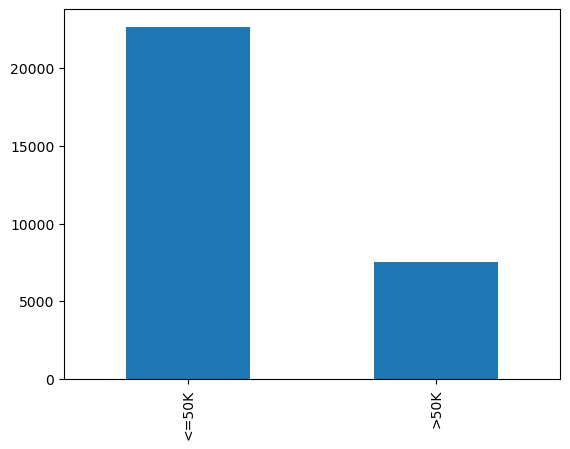

In [32]:
df['income'].value_counts().plot(kind='bar')

As per above visualization of target variable we can see the ratio is imbalanced.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Transport-moving'),
  Text(7, 0, 'Farming-fishing'),
  Text(8, 0, 'Machine-op-inspct'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Craft-repair'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

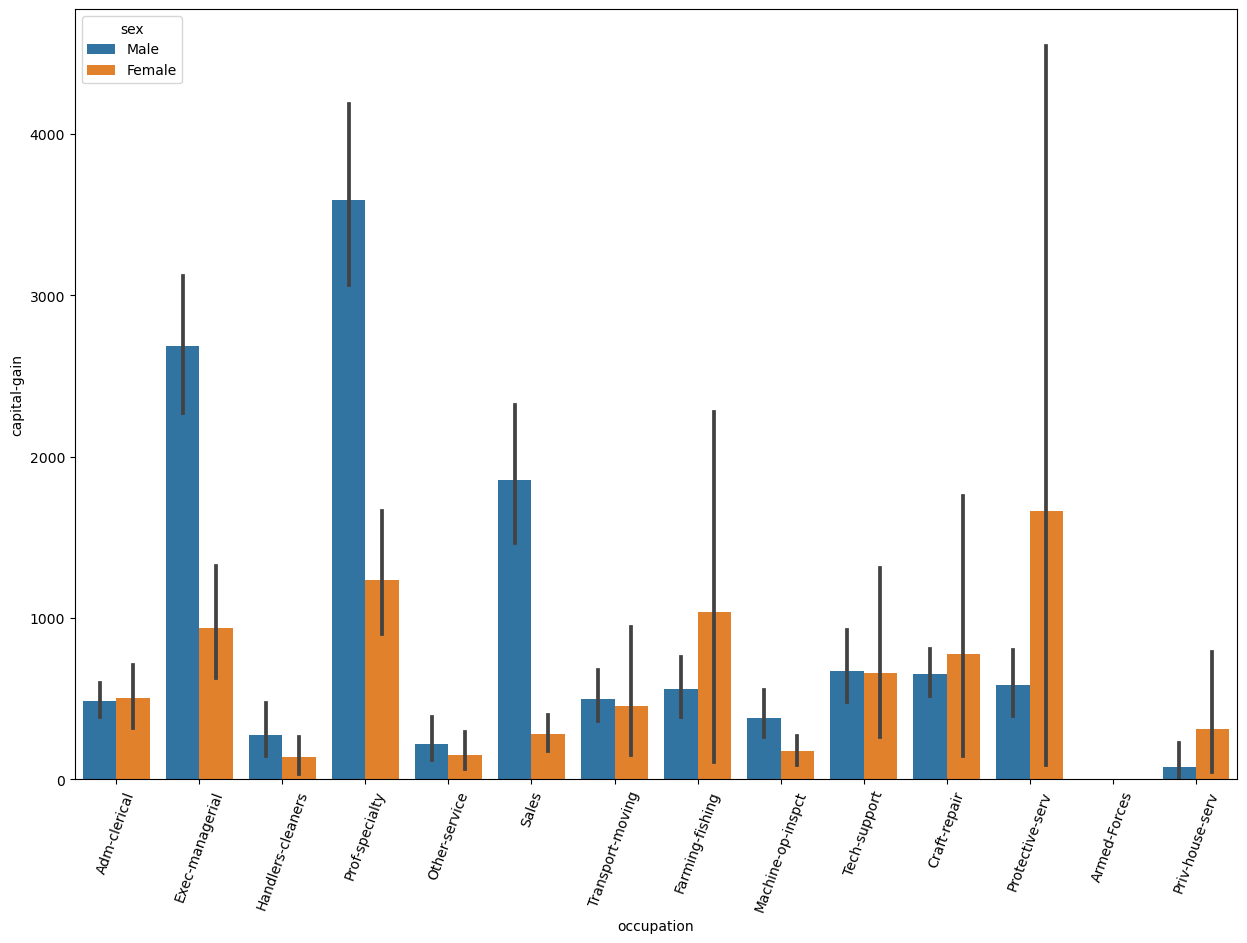

In [33]:
##Checking the distribution of Capital_gain and  Occupation as per gender##
plt.figure(figsize=(15,10))
sns.barplot(x='occupation',y='capital-gain',data=df,hue='sex')
plt.xticks(rotation=70)

<Axes: xlabel='education-num', ylabel='hours-per-week'>

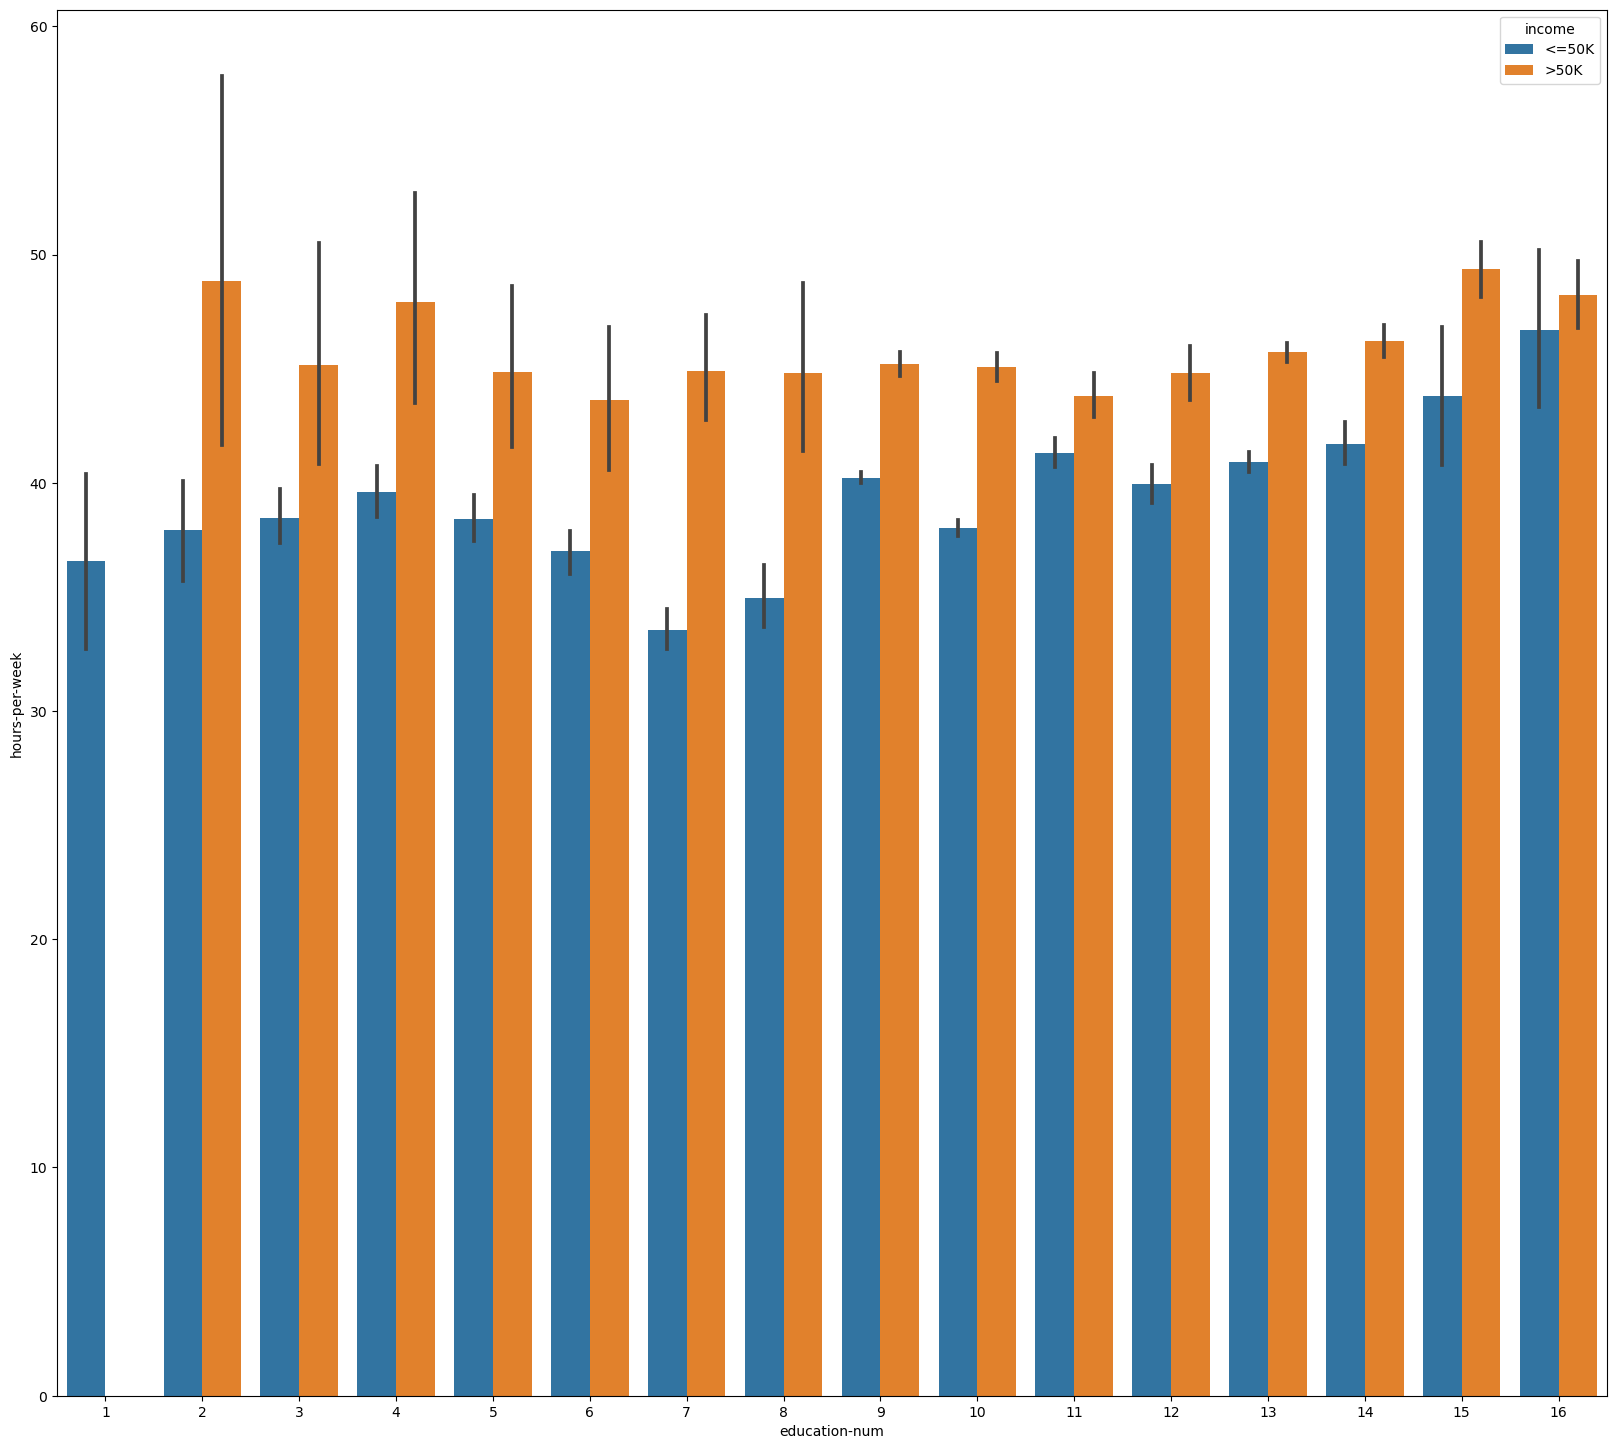

In [34]:
##Checking the distribution of Education and  Hours_per_week as gender###
plt.figure(figsize=(20,18))
sns.barplot(x='education-num',y='hours-per-week',data=df,hue='income')

Text(95.72222222222221, 0.5, 'Education Class')

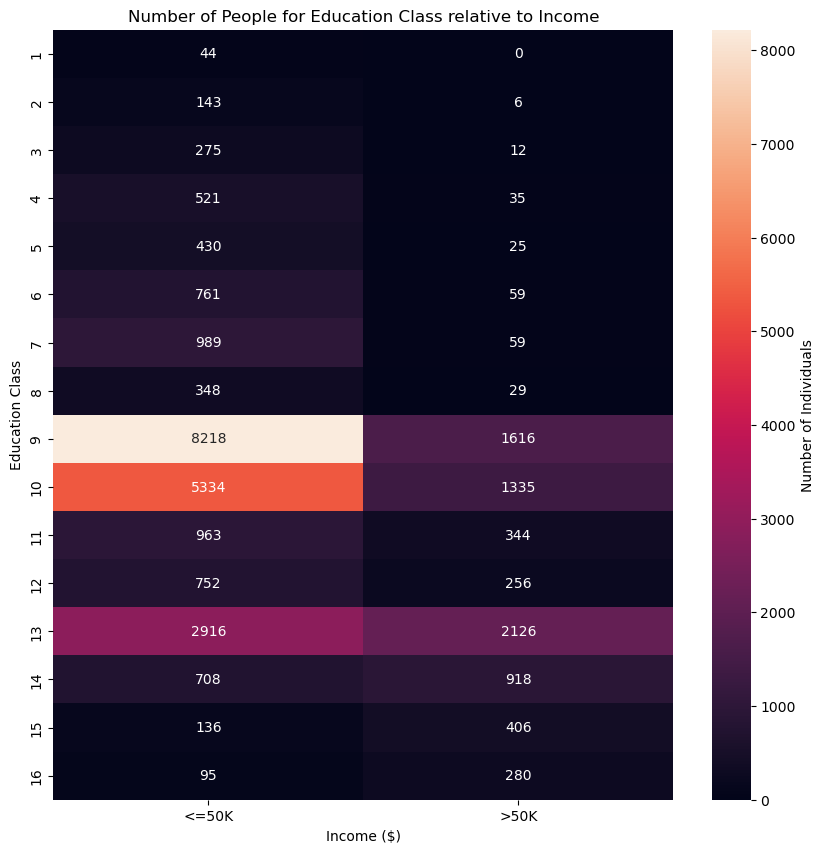

In [35]:
# Heat map
plt.figure(figsize=[10,10])
 
ct_counts = df.groupby(['education-num', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education-num', columns = 'income', values = 'count').fillna(0)

sns.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class')

In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

Text(0, 0.5, 'Average of Age')

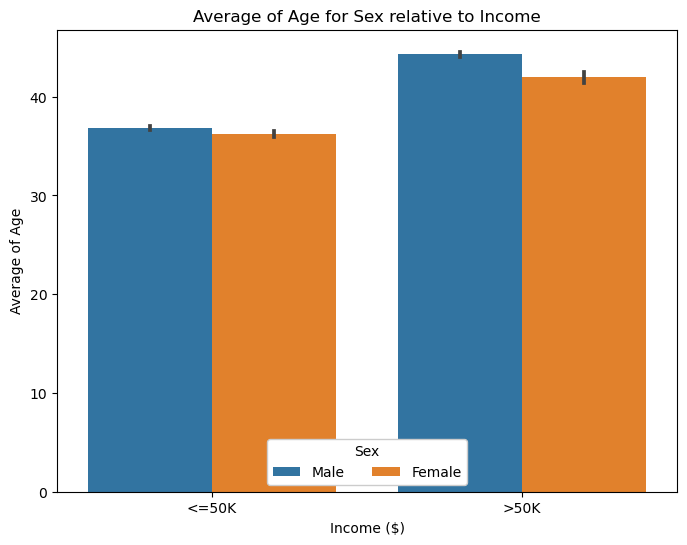

In [36]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sns.barplot(data = df, x = 'income', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age')

The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

Text(0, 0.5, 'Average of Hours per Week')

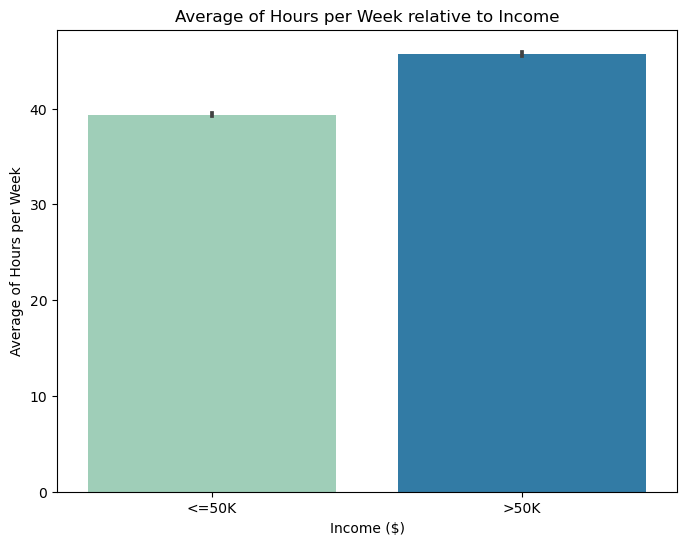

In [37]:
# Bar Chart 
plt.figure(figsize=[8,6])
sns.barplot(data=df, x='income', y='hours-per-week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week')

We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.

### Data Preprocessing

Encoding Categorical Variables:

As we have many features contains categorical variable so we are using pandas get_dummies function to convert into numeric and 2 variables “Income” and “Sex” columns conerting into binary using label encoder.

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # label encoder 
df['income']=le.fit_transform(df['income']) 
df['sex']=le.fit_transform(df['sex'])
#Converting 2 columns into binary 
df = pd.get_dummies(df,drop_first=True)
# pd.set_option('display.max_columns',100)#to display all columns

Now our data set has been transform into numeric.

In [39]:
df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Now our almost data values is 0 and 1 except few features like “‘Age’,’Fnlwgt’,’Education-num’,’Hours-per-week’” we can use standard scaler we and convert those features in same scale.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_col_sacle = df[['age','fnlwgt','education-num','hours-per-week']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)
df['age']= train_scaler_col['age']
df['fnlwgt']= train_scaler_col['fnlwgt']
df['education-num']= train_scaler_col['education-num']
df['hours-per-week']= train_scaler_col['hours-per-week']

As we have to scale only 4 features so I am stored it in a variable. And using standard scaler. later all 4 scale features replaced. Now our dataset has been scaled and ready for the model building.

In [41]:
df.dropna(inplace=True)

### Model Building

In [42]:
X = df.drop(['income'],axis=1)
y = df['income']

Data is now divided in independent and dependent.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

In [50]:
y_test

12836    0
28397    1
4426     0
6153     0
10595    0
        ..
6768     0
19051    0
1963     1
5536     0
5710     1
Name: income, Length: 8375, dtype: int32

Our data set divided into train and test. Now we will continue with model building.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 
print("Model is created")

Model is created


We are using almost 8 models. Now its time to train out model.

In [45]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [46]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

### Model Evaluation:

Our Model has been train now checking the accuracy:

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("Accuracy score for Logistic Regression Model", accuracy_score(y_test,lr_yprad))
print("confusion matrix for KNearest Neibour Model", accuracy_score(y_test,knn_yprad))
print("confusion matrix for Deciesion Tree Model", accuracy_score(y_test,dt_yprad))
print("confusion matrix for Random Forest Model", accuracy_score(y_test,rf_yprad))
print("confusion matrix for Adaboost Classifier", accuracy_score(y_test,adb_yprad))
print("confusion matrix for support vactor classifier", accuracy_score(y_test,svm_yprad))
print("confusion matrix for Gradient Boosting Classifier", accuracy_score(y_test,gdboost_yprad))
print("confusion matrix for Xtrim Gredient Boosting Classifier", accuracy_score(y_test,xgboost_yprad))

Accuracy score for Logistic Regression Model 0.8298507462686567
confusion matrix for KNearest Neibour Model 0.8342686567164179
confusion matrix for Deciesion Tree Model 0.7952238805970149
confusion matrix for Random Forest Model 0.8364179104477611
confusion matrix for Adaboost Classifier 0.847044776119403
confusion matrix for support vactor classifier 0.7983283582089552
confusion matrix for Gradient Boosting Classifier 0.8522985074626865
confusion matrix for Xtrim Gredient Boosting Classifier 0.8531343283582089


In [48]:
from imblearn.metrics import specificity_score

specificity_score(y_test,lr_yprad)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
# confusion matrix 

lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for Logistic Regression Model",'\n',lr_conf_mat)

knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for KNearest Neibour Model",'\n',knn_conf_mat)

dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for Deciesion Tree Model",'\n',dt_conf_mat)

rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for Random Forest Model",'\n',rf_conf_mat)

adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for Adaboost Classifier",'\n',adb_conf_mat)

svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for support vactor classifier",'\n',svm_conf_mat)

gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for Gradient Boosting Classifier",'\n',gdboost_conf_mat)

xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for Xtrim Gredient Boosting Classifier",'\n',xgboost_conf_mat)

In [ ]:
# Checking classification report for each model:

lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

As our data was imbalanced and in this case we have to consider F1-score and there are 2 models “xgboost ,‘gdboost’” giving the scores above 90% and rest of below 90%. In order to check our model is overfitted or not we are checking the cross validation for 2 models which are giving the scores above 90%.

#### ROC AUC Curve:
Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

#importing the roc and auc from sklearn and predect the x_test and checking the roc_auc_score
print("Logistic Regression: ", roc_auc_score(y_test,lr.predict(X_test)))
print("KNearest Neibour: ", roc_auc_score(y_test,knn.predict(X_test)))
print("Deciesion Tree: ", roc_auc_score(y_test,dt.predict(X_test)))
print("Random Forest: ", roc_auc_score(y_test,rf.predict(X_test)))
print("Adaboost Classifier: ", roc_auc_score(y_test,adb.predict(X_test)))
print("support vactor classifier: ", roc_auc_score(y_test,svm.predict(X_test)))
print("Gradient Boosting Classifier: ", roc_auc_score(y_test,gdboost.predict(X_test)))
print("Xtrim Gredient Boosting Classifier:", roc_auc_score(y_test,xgboost.predict(X_test)))

In [ ]:
from sklearn.metrics import RocCurveDisplay

#lets find roc curve to check best fittted model
disp = RocCurveDisplay.from_estimator(dt,X_test,y_test)
RocCurveDisplay.from_estimator(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
RocCurveDisplay.from_estimator(knn,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(dt,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(rf,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(adb,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(svm,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(gdboost,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

As per above also we can see our XGB classifier, Adaboost Classifier and Gradient Boosting classifier giving the best scores.

#### K-Fold Cross Validation :
K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 3 folds (K = 3). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation every time.

In [ ]:
# Importing cross validation from sklearn

from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

Now we have imported the Kfold cross validation , it will give 3 scores as we have gave parameter -n_split -3. Hence we are taking the mean of each model scores.

In [ ]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())
print("Cross validation score for Adaboost model","=>",cross_val_score(adb,X,y,cv=5).mean())

As per above we can see our ‘Adaboost’ model giving the less cross validation score. so we will consider this model is best for our prediction. 

## Hyperparameter Tuning


We will tune the hyperparameters of our random forest classifier using RandomizedSearchCV which finds the best hyperparameters by searching randomly avoiding unnecessary computation. We will try to find the best values for ‘n_estimators’ and ‘max_depth’.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 15)]
max_depth = [int(x) for x in np.linspace(40, 150, num = 15)]
param_dist = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
}
rf_tuned = RandomForestClassifier(random_state = 42)
rf_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = param_dist, cv = 5, random_state = 42)
rf_cv.fit(X_train, y_train)
rf_cv.best_score_

In [ ]:
rf_cv.best_params_

In [ ]:
from sklearn.metrics import f1_score

rf_best = RandomForestClassifier(max_depth = 102, n_estimators = 40, random_state = 42)
rf_best.fit(X_train, y_train)
Y_pred_rf_best = rf_best.predict(X_test)
print('Random Forest Classifier:') 
print('Accuracy score:',round(accuracy_score(y_test, Y_pred_rf_best) * 100, 2)) 
print('F1 score:',round(f1_score(y_test, Y_pred_rf_best) * 100, 2))

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, Y_pred_rf_best)
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_rf_best))


The model gives us the best values for an accuracy score of 83.71 and f1 score of 64.27 after tuning its hyperparameters.

### Conclusion:
We started the our project to import various libraries and imported the dataset. Observing the many important points like problem type and how many columns contains int, float and object values. As per statistic observations we found huge variations among the features and we have used standard scaler to scale the variables. Besides this, we have identified there are 3 columns where instead the NaN it is in “?” so we deleted such rows. During this process we used seaborn and matplotlib to do the visualizations and converted categorical features into numeric using label encoder and pandas get_dummies function. Afterwards we started training different different machine learning models, picked one of them (Adaboost) and applied cross validation on it.

### Future Possibilities of the Project:
There are many other ways also to improve the model accuracy like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features, Along with resampling the data in case of imbalance or more extensive hyperparameter tuning on several machine learning models.